In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fast_plotter.utils as fst
import fast_plotter.plotting as fst_plt

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4
rcParams['figure.dpi'] = 150

## Load in the data

In [3]:
!head "example_outputs/tbl_dataset.nMuons.nIsoMuons--weighted.csv"

dataset,nMuons,nIsoMuons,n,weighted:sumw,weighted:sumw2
data,0,0,227265.0,,
data,1,0,17795.0,,
data,1,1,205616.0,,
data,2,0,107.0,,
data,2,1,2393.0,,
data,2,2,16207.0,,
data,3,3,1.0,,
dy,0,0,2181.0,787.2786254882812,553.8453979492188
dy,1,0,2472.0,910.0523681640625,678.6613159179688


In [4]:
muons = fst.read_binned_df("example_outputs/tbl_dataset.nMuons.nIsoMuons--weighted.csv")
muons.head(15)

n  weighted:sumw  weighted:sumw2
dataset nMuons nIsoMuons                                         
data    0      0          227265.0            NaN             NaN
        1      0           17795.0            NaN             NaN
               1          205616.0            NaN             NaN
        2      0             107.0            NaN             NaN
               1            2393.0            NaN             NaN
               2           16207.0            NaN             NaN
        3      3               1.0            NaN             NaN
dy      0      0            2181.0     787.278625    5.538454e+02
        1      0            2472.0     910.052368    6.786613e+02
               1           29027.0   13163.787109    9.294289e+03
        2      0             351.0     101.003471    5.739213e+01
               1            6139.0    2323.938477    1.318130e+03
               2           37558.0   16828.931641    9.283851e+03
        3      3               1.0       0.518289    2.686235e-01
qcd     0      0             124.0   18058.283203    2.539280e+07

In [5]:
# Sort the datasets so that the largest overall contribution comes first
# making the stacking easier to read in log scale (and unchanged in linear)
muons = fst.order_datasets(muons,"sum-ascending", values="weighted:sumw")
muons.groupby(level=0, sort=False).nth(0)

,n,weighted:sumw,weighted:sumw2
dataset,,,
data,227265.0,NaN,NaN
zz,59.0,0.310779,2.388770e-03
wz,157.0,2.627532,6.310513e-02
ww,264.0,11.555492,6.745440e-01
single_top,272.0,13.793803,8.427736e-01
ttbar,30856.0,6590.465820,1.715457e+03
dy,2181.0,787.278625,5.538454e+02
qcd,124.0,18058.283203,2.539280e+07
wjets,7080.0,11070.950195,2.397548e+04


In [6]:
# Replace NaNs in sumw columns for data with the raw counts
muons.fillna(method="ffill", axis="columns", inplace=True)

## Project 2D to 1D vs datasets

In [7]:
muons_1d = muons.groupby(level=("dataset", "nMuons")).sum()
muons_1d.head(8)

n  weighted:sumw  weighted:sumw2
dataset nMuons                                         
data    0       227265.0  227265.000000   227265.000000
        1       223411.0  223411.000000   223411.000000
        2        18707.0   18707.000000    18707.000000
        3            1.0       1.000000        1.000000
zz      0           59.0       0.310779        0.002389
        1          949.0       6.468755        0.053503
        2         1371.0       9.846543        0.081745
        3           34.0       0.243056        0.002005

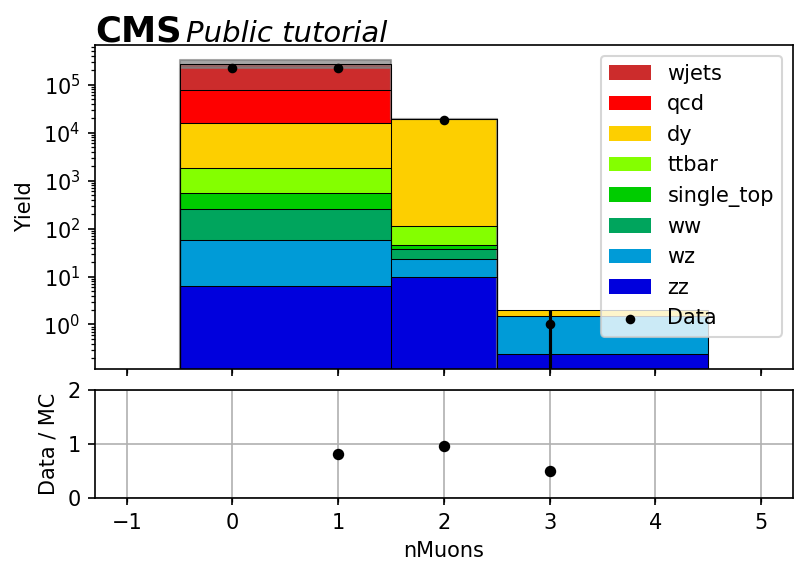

In [8]:
main, ratio = fst_plt.plot_1d_many(muons_1d, prefix="weighted")

main.set_yscale("log")
main.set_ylabel("Yield")
main.annotate("CMS", (0, 1.01), xycoords="axes fraction",fontsize=17, fontweight="bold")
main.annotate("Public tutorial", (0.13, 1.01), xycoords="axes fraction",fontsize=14, fontstyle="italic")
main.legend()

## Plot the Dimuon data
Uses an "interval index"

In [9]:
dimuon = fst.read_binned_df("example_outputs/tbl_dataset.dimu_mass--weighted.csv")
dimuon.head()

n  weighted:sumw  weighted:sumw2
dataset dimu_mass                                         
data    (-inf, 60.0]  993.0            NaN             NaN
        (60.0, 61.0]   38.0            NaN             NaN
        (61.0, 62.0]   25.0            NaN             NaN
        (62.0, 63.0]   22.0            NaN             NaN
        (63.0, 64.0]   28.0            NaN             NaN

(0.1, 1000000.0)

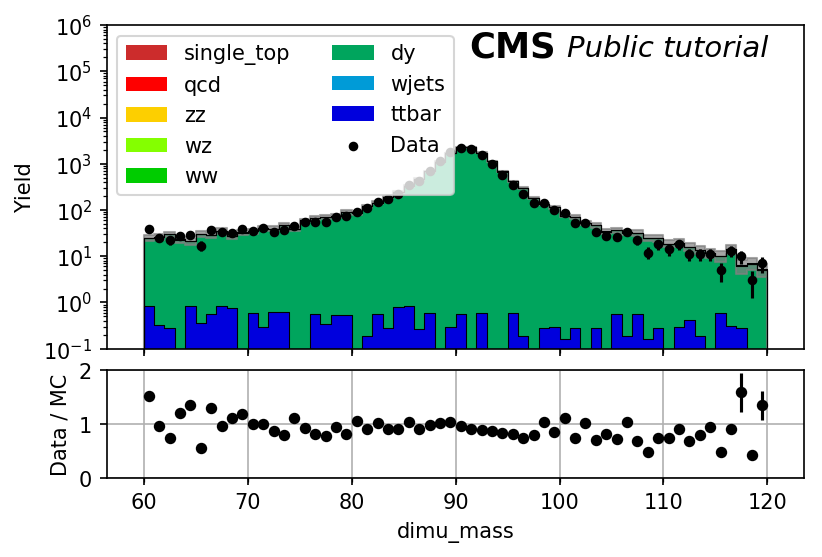

In [10]:
# Fx the dataset ordering to match the original 
order = ["data", "ttbar", "wjets", "dy", "ww", "wz", "zz", "qcd", "single_top"]
dimuon = dimuon.reindex(order, axis=0, level=0).fillna(method="ffill", axis="columns")

main, ratio = fst_plt.plot_1d_many(dimuon, prefix="weighted")

main.set_yscale("log")
main.set_ylabel("Yield")
main.annotate("CMS", (0.52, 0.90), xycoords="axes fraction",fontsize=17, fontweight="bold")
main.annotate("Public tutorial", (0.66, 0.902), xycoords="axes fraction",fontsize=14, fontstyle="italic")
main.legend(loc="upper left", ncol=2)
main.set_ylim([1e-1, 1e6])

(0.1, 1000000.0)

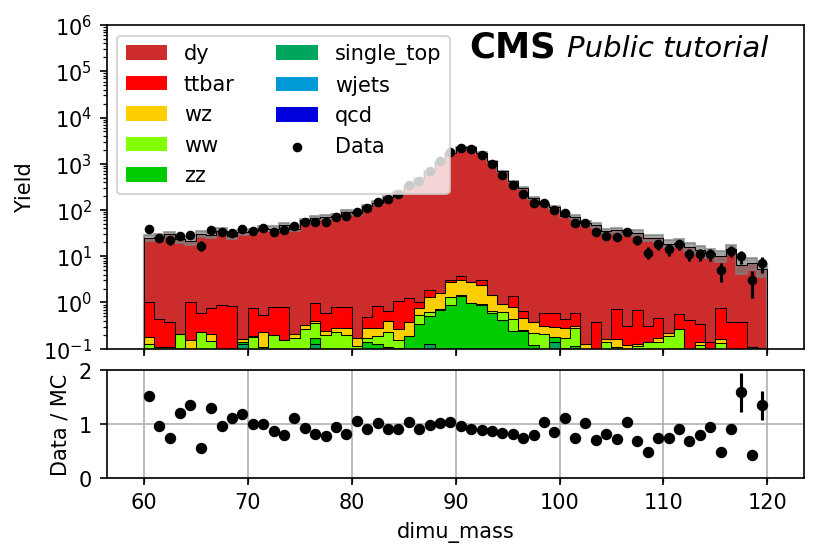

In [11]:
# Or sort the stack first:
dimuon = fst.order_datasets(dimuon,"sum-ascending", values="weighted:sumw")
main, ratio = fst_plt.plot_1d_many(dimuon, prefix="weighted")

main.set_yscale("log")
main.set_ylabel("Yield")
main.annotate("CMS", (0.52, 0.90), xycoords="axes fraction",fontsize=17, fontweight="bold")
main.annotate("Public tutorial", (0.66, 0.902), xycoords="axes fraction",fontsize=14, fontstyle="italic")
main.legend(loc="upper left", ncol=2)
main.set_ylim([1e-1, 1e6])